In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [39]:
df_train = pd.read_csv('E:\\Datasets\\nslTrain_data.csv')

In [40]:
df_test = pd.read_csv('E:\\Datasets\\nslTest_data.csv')
df_test.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,202,0,icmp,25,4,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,768,0,icmp,25,2,312,1856,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,3753,0,icmp,25,2,245,2058,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,20087,0,icmp,25,2,298,1267,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,16159,0,icmp,20,2,740,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


In [41]:
df_test = df_test.drop(df_test.columns[[0]],axis = 1)

In [42]:
df = pd.concat([df_train, df_test])

In [43]:
df.shape

(135973, 42)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'dos'),
  Text(2, 0, 'r2l'),
  Text(3, 0, 'probe'),
  Text(4, 0, 'u2r')])

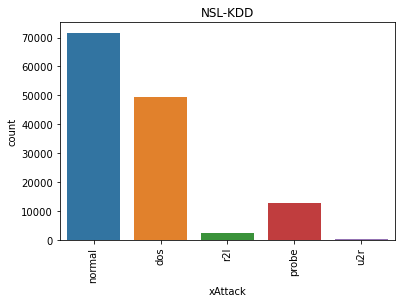

In [44]:
sns.countplot(x = "xAttack", data = df).set(title='NSL-KDD')
df["xAttack"].value_counts()
plt.xticks(rotation=90)

In [45]:
df.duplicated().sum()

302

In [46]:
df =  df.drop_duplicates(keep="first")

In [47]:
df.duplicated().sum()

0

In [48]:
df.isnull().sum().sort_values(ascending = False)

duration                       0
dst_host_count                 0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_srv_count             0
protocol_type                  0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
count                          0
is_guest_login                 0
is_host_login                  0
num_outbound_cmds              0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent    

In [49]:
df.isna().mean()*100

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

In [50]:
df.dropna(axis=0,inplace=True,how="any")

In [51]:
df=df.groupby('xAttack').filter(lambda x:len(x)>10000)
df['xAttack'].value_counts()

normal    71641
dos       49066
probe     12631
Name: xAttack, dtype: int64

In [52]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [53]:
df = df.replace(0, np.nan)

In [54]:
df.dropna(how = "all", axis =1,inplace = True )
df.fillna(0, inplace = True)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0.0,icmp,20,2,491.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,45,2,146.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,icmp,50,4,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0.0,icmp,25,2,232.0,8153.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,icmp,25,2,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [55]:
#selected_features=['src_bytes', 'dst_bytes','same_srv_rate','dst_host_serror_rate','diff_srv_rate', 'count',
#                    'srv_count','serror_rate','dst_host_same_srv_rate','same_srv_rate', 'dst_host_same_srv_rate',
#                    'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_diff_srv_rate', 'dst_host_srv_serror_rate']

In [56]:
df = df.drop(['duration','protocol_type','service','flag','land','wrong_fragment','urgent','hot','num_failed_logins'],axis=1)
df = df.drop(['logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells'],axis=1)
df= df.drop(['num_access_files','is_host_login','is_guest_login','rerror_rate','srv_rerror_rate','dst_host_count'],axis=1)
df = df.drop(['dst_host_srv_count','dst_host_serror_rate','dst_host_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'],axis=1)

In [57]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133338 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   src_bytes                    133338 non-null  float32
 1   dst_bytes                    133338 non-null  float32
 2   count                        133338 non-null  float32
 3   srv_count                    133338 non-null  float32
 4   serror_rate                  133338 non-null  float32
 5   srv_serror_rate              133338 non-null  float32
 6   same_srv_rate                133338 non-null  float32
 7   diff_srv_rate                133338 non-null  float32
 8   srv_diff_host_rate           133338 non-null  float32
 9   dst_host_same_srv_rate       133338 non-null  float32
 10  dst_host_diff_srv_rate       133338 non-null  float32
 11  dst_host_same_src_port_rate  133338 non-null  float32
 12  dst_host_srv_diff_host_rate  133338 non-null  float32
 13  d

In [59]:
X = df.drop(['xAttack'], axis=1)
y = df['xAttack']

In [60]:
X.shape

(133338, 14)

In [61]:
y.value_counts()

normal    71641
dos       49066
probe     12631
Name: xAttack, dtype: int64

In [63]:
def targetify(x):
    if x == 'normal':
        return 0
    else:
        return 1

In [64]:
labels = df['xAttack']    #For multiclass classification
df['Target']=df['xAttack'].apply(targetify)
y = df['Target']

In [65]:
y.value_counts()

0    71641
1    61697
Name: Target, dtype: int64

In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=2)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,average_precision_score
from sklearn.metrics import accuracy_score

In [69]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train);
preds_dc = dc.predict(x_test)
score_dc = accuracy_score(preds_dc,y_test)
score_dc

0.9965251737413129

In [70]:
print(classification_report(y_test, preds_dc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21627
           1       1.00      1.00      1.00     18375

    accuracy                           1.00     40002
   macro avg       1.00      1.00      1.00     40002
weighted avg       1.00      1.00      1.00     40002



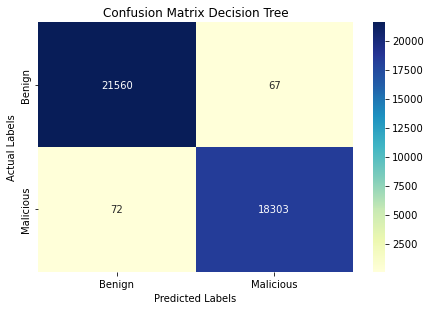

In [71]:
labels = ["Benign", "Malicious"]

# Compute the confusion matrix
cm = confusion_matrix(y_test, preds_dc)

# Combine the classes into "Malicious"
cm[1:, 1] = cm[1:, 1:].sum(axis=1)
cm = cm[:2, :2]

# Create a DataFrame from the confusion matrix and replace the labels
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap with annotated values
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()

# Set the title, x and y labels
plt.title("Confusion Matrix Decision Tree")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# Show the plot
plt.show()

In [72]:
result_DT=accuracy_score(preds_dc,y_test)
result_DT

0.9965251737413129

In [73]:
import time

In [74]:
start_time = time.time()
dc.fit(x_train, y_train.values.ravel())
end_time = time.time()

In [75]:
print("Training time: ",end_time-start_time)

Training time:  0.3225729465484619


In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =15, random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [77]:
y_Rpred=rf.predict(x_test)

In [78]:
result_Rf=accuracy_score(y_Rpred,y_test)
result_Rf

0.9969251537423128

In [79]:
print(classification_report(y_test, y_Rpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21627
           1       1.00      1.00      1.00     18375

    accuracy                           1.00     40002
   macro avg       1.00      1.00      1.00     40002
weighted avg       1.00      1.00      1.00     40002



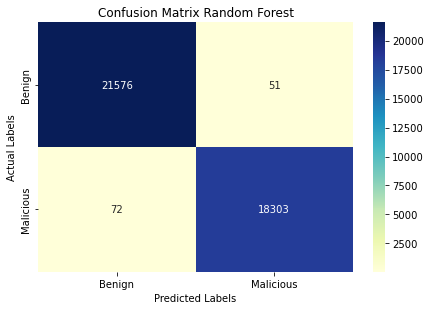

In [80]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_Rpred)
labels = ["Benign", "Malicious"]

# Combine the classes into "Malicious"
cm[1:, 1] = cm[1:, 1:].sum(axis=1)
cm = cm[:2, :2]

# Create a DataFrame from the confusion matrix and replace the labels
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap with annotated values
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()

# Set the title, x and y labels
plt.title("Confusion Matrix Random Forest")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# Show the plot
plt.show()

In [81]:
start_time = time.time()
rf.fit(x_train, y_train.values.ravel())
end_time = time.time()

In [82]:
print("Training time: ",end_time-start_time)

Training time:  1.130420207977295


In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_Apred = model.predict(x_test)

In [85]:
result_Ad=accuracy_score(y_Apred,y_test)
result_Ad

0.9846257687115644

In [86]:
print(classification_report(y_test, y_Apred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21627
           1       0.98      0.98      0.98     18375

    accuracy                           0.98     40002
   macro avg       0.98      0.98      0.98     40002
weighted avg       0.98      0.98      0.98     40002



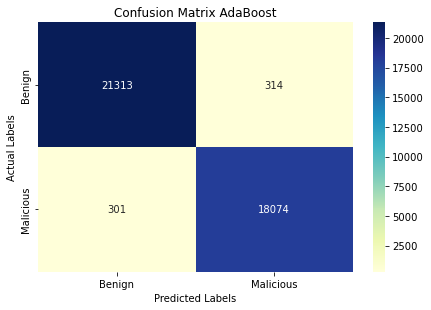

In [87]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_Apred)
labels = ["Benign", "Malicious"]

# Combine the classes into "Malicious"
cm[1:, 1] = cm[1:, 1:].sum(axis=1)
cm = cm[:2, :2]

# Create a DataFrame from the confusion matrix and replace the labels
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap with annotated values
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()

# Set the title, x and y labels
plt.title("Confusion Matrix AdaBoost")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# Show the plot
plt.show()

In [88]:
start_time = time.time()
model.fit(x_train, y_train.values.ravel())
end_time = time.time()

In [89]:
print("Training time: ",end_time-start_time)

Training time:  3.9590981006622314


In [90]:
from catboost import CatBoostClassifier

In [91]:
# Create adaboost classifer object
catc = CatBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
modelc = catc.fit(x_train, y_train)

#Predict the response for test dataset
y_cpred = modelc.predict(x_test)

0:	learn: 0.1801365	total: 247ms	remaining: 12.1s
1:	learn: 0.0919880	total: 293ms	remaining: 7.03s
2:	learn: 0.0592788	total: 321ms	remaining: 5.03s
3:	learn: 0.0424243	total: 339ms	remaining: 3.9s
4:	learn: 0.0360837	total: 353ms	remaining: 3.17s
5:	learn: 0.0295381	total: 368ms	remaining: 2.69s
6:	learn: 0.0266357	total: 382ms	remaining: 2.35s
7:	learn: 0.0236476	total: 399ms	remaining: 2.09s
8:	learn: 0.0225593	total: 414ms	remaining: 1.88s
9:	learn: 0.0208628	total: 429ms	remaining: 1.71s
10:	learn: 0.0193514	total: 450ms	remaining: 1.59s
11:	learn: 0.0185685	total: 466ms	remaining: 1.47s
12:	learn: 0.0178959	total: 481ms	remaining: 1.37s
13:	learn: 0.0168798	total: 496ms	remaining: 1.28s
14:	learn: 0.0163884	total: 510ms	remaining: 1.19s
15:	learn: 0.0160011	total: 524ms	remaining: 1.11s
16:	learn: 0.0152941	total: 540ms	remaining: 1.05s
17:	learn: 0.0150222	total: 556ms	remaining: 989ms
18:	learn: 0.0147686	total: 572ms	remaining: 933ms
19:	learn: 0.0146068	total: 588ms	remainin

In [92]:
print(classification_report(y_test, y_cpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21627
           1       1.00      1.00      1.00     18375

    accuracy                           1.00     40002
   macro avg       1.00      1.00      1.00     40002
weighted avg       1.00      1.00      1.00     40002



In [93]:
result_C=accuracy_score(y_cpred,y_test)
result_C

0.9960501974901255

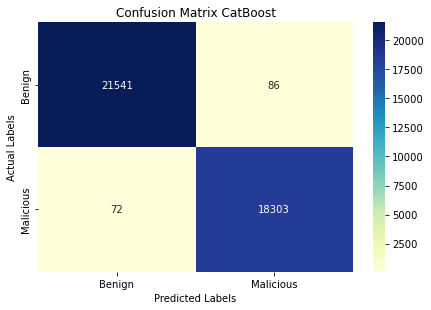

In [94]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_cpred)
labels = ["Benign", "Malicious"]

# Combine the classes into "Malicious"
cm[1:, 1] = cm[1:, 1:].sum(axis=1)
cm = cm[:2, :2]

# Create a DataFrame from the confusion matrix and replace the labels
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap with annotated values
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()

# Set the title, x and y labels
plt.title("Confusion Matrix CatBoost")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# Show the plot
plt.show()

In [95]:
start_time = time.time()
modelc.fit(x_train, y_train.values.ravel())
end_time = time.time()

0:	learn: 0.1801365	total: 23.6ms	remaining: 1.16s
1:	learn: 0.0919880	total: 40.9ms	remaining: 981ms
2:	learn: 0.0592788	total: 56ms	remaining: 877ms
3:	learn: 0.0424243	total: 70.5ms	remaining: 810ms
4:	learn: 0.0360837	total: 84ms	remaining: 756ms
5:	learn: 0.0295381	total: 98.8ms	remaining: 724ms
6:	learn: 0.0266357	total: 113ms	remaining: 697ms
7:	learn: 0.0236476	total: 129ms	remaining: 675ms
8:	learn: 0.0225593	total: 142ms	remaining: 649ms
9:	learn: 0.0208628	total: 157ms	remaining: 628ms
10:	learn: 0.0193514	total: 172ms	remaining: 609ms
11:	learn: 0.0185685	total: 186ms	remaining: 589ms
12:	learn: 0.0178959	total: 200ms	remaining: 570ms
13:	learn: 0.0168798	total: 215ms	remaining: 554ms
14:	learn: 0.0163884	total: 235ms	remaining: 549ms
15:	learn: 0.0160011	total: 250ms	remaining: 532ms
16:	learn: 0.0152941	total: 266ms	remaining: 517ms
17:	learn: 0.0150222	total: 280ms	remaining: 498ms
18:	learn: 0.0147686	total: 294ms	remaining: 479ms
19:	learn: 0.0146068	total: 307ms	remai

In [96]:
print("Training time: ",end_time-start_time)

Training time:  0.905925989151001


In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(df)

In [99]:
from xgboost import XGBClassifier
xgbclassifier = XGBClassifier(max_depth=5, n_estimators =30, learning_rate =1.0)
xgbclassifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [100]:
y_Xpred=xgbclassifier.predict(x_test)

In [101]:
result_xg=accuracy_score(y_Xpred,y_test)
result_xg

0.9976251187440628

In [102]:
print(classification_report(y_test, y_Xpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21627
           1       1.00      1.00      1.00     18375

    accuracy                           1.00     40002
   macro avg       1.00      1.00      1.00     40002
weighted avg       1.00      1.00      1.00     40002



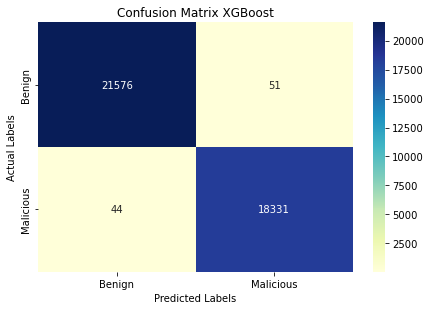

In [103]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_Xpred)
labels = ["Benign", "Malicious"]

# Combine the classes into "Malicious"
cm[1:, 1] = cm[1:, 1:].sum(axis=1)
cm = cm[:2, :2]

# Create a DataFrame from the confusion matrix and replace the labels
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the heatmap with annotated values
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()

# Set the title, x and y labels
plt.title("Confusion Matrix XGBoost")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# Show the plot
plt.show()

In [104]:
start_time = time.time()
xgbclassifier.fit(x_train, y_train)
end_time = time.time()

In [105]:
print("Training time: ",end_time-start_time)

Training time:  1.2552342414855957


In [106]:
first_model = {'Model': [ 'Decision Tree', 'RandomForest', 'XGboost', 'AdaBoost','CatBoost'],
               'accuracy' : [ score_dc, result_Rf, result_xg, result_Ad,result_C]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Decision Tree,0.996525
1,RandomForest,0.996925
2,XGboost,0.997625
3,AdaBoost,0.984626
4,CatBoost,0.996050
